<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 30 Class 1</h1> 
    <h3>04/26/21</h3>
</div>

## Objectives for this week:
* Continuing our data science journey.

## Todays Agenda
* Interview Questions
* More on Hypothesis Testing
* Django Templating

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Interview Question Presentation</h1> 
</div>

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Homework Presentation</h1> 
</div>

# Exercise 1
```
Table: Customers

+--------------+------+
| Column Name  | Type |
+--------------+------+
| customer_id  | int  |
| year         | int  |
| revenue      | int  |
+--------------+------+
(customer_id, year) is the primary key for this table.
This table contains the customer ID and the revenue of customers in different years.
Note that this revenue can be negative.
```
 
Write an SQL query to report the customers with **postive revenue** in the year 2021.

Return the result table in **any order**.

The query result format is in the following example:

```
Customers
+-------------+------+---------+
| customer_id | year | revenue |
+-------------+------+---------+
| 1           | 2018 | 50      |
| 1           | 2021 | 30      |
| 1           | 2020 | 70      |
| 2           | 2021 | -50     |
| 3           | 2018 | 10      |
| 3           | 2016 | 50      |
| 4           | 2021 | 20      |
+-------------+------+---------+

Result table:
+-------------+
| customer_id |
+-------------+
| 1           |
| 4           |
+-------------+

Customer 1 has revenue equal to 30 in year 2021.
Customer 2 has revenue equal to -50 in year 2021.
Customer 3 has no revenue in year 2021.
Customer 4 has revenue equal to 20 in year 2021.
Thus only customers 1 and 4 have postive revenue in year 2021.
```
 

In [ ]:
import sqlite3

sql_commands = \
"""
DROP TABLE IF EXISTS Customers;

CREATE TABLE Customers (
 customer_id INTEGER NOT NULL,
 year INT NOT NULL,
 revenue INT NOT NULL
);

INSERT into Customers (customer_id, year, revenue) values ('1', '2018', '50');
INSERT into Customers (customer_id, year, revenue) values ('1', '2021', '30');
INSERT into Customers (customer_id, year, revenue) values ('1', '2020', '70');
INSERT into Customers (customer_id, year, revenue) values ('2', '2021', '-50');
INSERT into Customers (customer_id, year, revenue) values ('3', '2018', '10');
INSERT into Customers (customer_id, year, revenue) values ('3', '2016', '50');
INSERT into Customers (customer_id, year, revenue) values ('4', '2021', '20');
"""

db = sqlite3.connect('week-29-homework.db')
cursor = db.cursor()
cursor.executescript(sql_commands)
db.commit()
db.close()

In [ ]:
# use this function for your answers.
def with_conn(statement):
    conn = sqlite3.connect('week-29-homework.db')
    with conn:
        cur = conn.cursor()
        cur.execute(statement)
        result = cur.fetchall()
        return result

In [ ]:
with_conn("SELECT customer_id FROM Customers WHERE revenue > 0 AND year = 2021")

In [ ]:
with_conn("SELECT customer_id, revenue, year FROM Customers WHERE revenue > 0 AND year = 2021")

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>SQL</h1> 
</div>

We should know these commands

```sqlite
SELECT column1, column2 FROM table_name;

SELECT * FROM table_name;

SELECT DISTINCT column1, column2 FROM table_name;

SELECT * FROM table_name WHERE condition;

SELECT * FROM table_name WHERE column1="text";

SELECT * FROM table_name WHERE id=1;

SELECT * FROM table_name WHERE id < 10;

SELECT * FROM table_name WHERE id > 10;

SELECT * FROM table_name WHERE id =< 10;

SELECT * FROM table_name WHERE id <> 10; 

SELECT * FROM table_name WHERE id != 10;

SELECT * FROM table_name WHERE column1 IS NULL;

SELECT * FROM table_name WHERE column1 IS NOT NULL;

SELECT * FROM table_name WHERE condition1 AND condition2;

SELECT * FROM table_name WHERE condition1 OR condition2;

SELECT * FROM table_name WHERE NOT condition;

SELECT column1 AS new_column_name FROM table_name;

SELECT column1, column2 AS [new_column1 new_column2] FROM table_name;

SELECT (column1, column2) FROM table_name AS new_table_name;

SELECT int_column FROM table_name BETWEEN 10 AND 20;

SELECT text_column FROM table_name BETWEEN 'a' AND 'z';

SELECT date_column FROM table_name BETWEEN '1996-07-01' AND '1996-07-31';

SELECT * FROM table_name LIKE pattern;

SELECT * FROM table_name IN ('text1', 'text2');

SELECT * FROM table_name NOT IN ('text1', 'text2');

SELECT * FROM table_name ORDER BY column1, column2 ASC;

SELECT * FROM table_name ORDER BY column1, column2 DESC;

SELECT MIN(column1) AS NewName FROM table_name;

SELECT MAX(column1) AS NewName FROM table_name;

SELECT COUNT(column1) AS NewName FROM table_name;

SELECT AVG(column1) AS NewName FROM table_name;

SELECT SUM(column1) AS NewName FROM table_name;

INSERT INTO table_name (column1, column2, column3) VALUES (value1, value2, value3);

INSERT INTO table_name VALUES (value1, value2, value3, value4, value5);

UPDATE table_name SET column1 = value1, column2 = value2 WHERE condition;

DELETE FROM table_name WHERE condition;




```

Say you had two tables:

```sql
Table: Customers

+--------------+------+
| Column Name  | Type |
+--------------+------+
| customer_id  | int  |
| name         | text |
| address      | text |
| email        | text |
+--------------+------+


Table: Orders

+--------------+------+
| Column Name  | Type |
+--------------+------+
| order_id     | int  |
| customer_id  | int  |
| total        | int  |
| shipped      | bool |
+--------------+------+
```

In [1]:
import sqlite3

sql_commands = \
"""
DROP TABLE IF EXISTS Customers;
DROP TABLE IF EXISTS Orders;
DROP TABLE IF EXISTS email_list;

CREATE TABLE Customers (
 customer_id INTEGER PRIMARY KEY,
 name TEXT NOT NULL,
 address TEXT NOT NULL,
 email TEXT NOT NULL
);

CREATE TABLE Orders (
 order_id INTEGER PRIMARY KEY,
 customer_id INTEGER NOT NULL,
 total INTEGER NOT NULL,
 shipped BOOL NOT NULL,
 FOREIGN KEY(customer_id) REFERENCES Customer(customer_id)
);

CREATE TABLE email_list (
  elist_id INTEGER PRIMARY KEY,
  user TEXT,                      
  address TEXT,
  email TEXT NOT NULL
);

INSERT into Customers (name, address, email) values ('alice', '20 Broadway', 'alice@gmail.com');
INSERT into Customers (name, address, email) values ('bob', '72 4th Ave', 'bob@tutanota.com');
INSERT into Customers (name, address, email) values ('carol', '1002 138th Street', 'carol@protonmail.com');
INSERT into Customers (name, address, email) values ('dave', '345 Chambers Street', 'dave@dave.com');


INSERT into Orders (customer_id, total, shipped) values (1, 20000, true);
INSERT into Orders (customer_id, total, shipped) values (2, 10000, true);
INSERT into Orders (customer_id, total, shipped) values (3, 5000, true);
INSERT into Orders (customer_id, total, shipped) values (2, 25000, true);

INSERT into Orders (customer_id, total, shipped) values (1, 21000, false);
INSERT into Orders (customer_id, total, shipped) values (2, 20000, false);
INSERT into Orders (customer_id, total, shipped) values (3, 20000, false);
INSERT into Orders (customer_id, total, shipped) values (1, 10000, false);

INSERT into email_list (email) values ('random@person.com');
INSERT into email_list (user, address, email) values ('name', 'address', 'email');
"""

db = sqlite3.connect('week-30-class.db')
cursor = db.cursor()
cursor.executescript(sql_commands)
db.commit()
db.close()

In [2]:
# use this function for your answers.
def with_conn(statement):
    conn = sqlite3.connect('week-30-class.db')
    with conn:
        cur = conn.cursor()
        cur.execute(statement)
        result = cur.fetchall()
        return result

In [4]:
with_conn("SELECT * FROM Customers;")

[(1, 'alice', '20 Broadway', 'alice@gmail.com'),
 (2, 'bob', '72 4th Ave', 'bob@tutanota.com'),
 (3, 'carol', '1002 138th Street', 'carol@protonmail.com'),
 (4, 'dave', '345 Chambers Street', 'dave@dave.com')]

In [5]:
with_conn("SELECT * FROM Orders;")

[(1, 1, 20000, 1),
 (2, 2, 10000, 1),
 (3, 3, 5000, 1),
 (4, 2, 25000, 1),
 (5, 1, 21000, 0),
 (6, 2, 20000, 0),
 (7, 3, 20000, 0),
 (8, 1, 10000, 0)]

In [7]:
with_conn("SELECT customer_id, total FROM Orders GROUP BY customer_id;")

[(1, 20000), (2, 10000), (3, 5000)]

In [6]:
with_conn("SELECT customer_id, sum(total) FROM Orders GROUP BY customer_id;")  # kind of like with pandas dataframe

[(1, 51000), (2, 55000), (3, 25000)]

In [8]:
with_conn("SELECT customer_id, sum(total) FROM Orders WHERE customer_id IN (1,2) GROUP BY customer_id;")

[(1, 51000), (2, 55000)]

In [ ]:
# WHAT ABOUT NAME OF THE CUSTOMER, NAME In Customers Table JOIN TWO TABLES, Foreign keys mentioned in both
# Diff col, customer has name address and email, need reference in both that match up = customer_id

one to many

customers have many orders

orders have many customers - one to many in other direction if we switch the foreign keys, loose reference to the other order
reference is important to have proper one to many, many to many relationship

put reference in orders to reference single customer ID, know cust id from the order, use to refer to customer name, route can take to get cust info, SELECT from more than one table 



In [9]:
# using aliases
# string in python \ continues on next line
# works same as an inner join
# joins custs, if have corresponding in 
# {(4)SELECT,  (1)FROM, (2)WHERE, (3)GROUP BY}

with_conn("SELECT c.name, sum(o.total) FROM Customers AS c, Orders AS o \
WHERE c.customer_id = o.customer_id GROUP BY c.customer_id;")  # end or o.customer.id   

# getting name now instead of customer id

[('alice', 51000), ('bob', 55000), ('carol', 25000)]

In [10]:
#Same as INNER JOIN

with_conn("SELECT c.name, c.address, c.email, o.total, o.shipped \
FROM Customers AS c, Orders AS o WHERE c.customer_id = o.customer_id")  

[('alice', '20 Broadway', 'alice@gmail.com', 20000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 10000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 5000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 25000, 1),
 ('alice', '20 Broadway', 'alice@gmail.com', 21000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 20000, 0),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 20000, 0),
 ('alice', '20 Broadway', 'alice@gmail.com', 10000, 0)]

### `INNER JOIN`

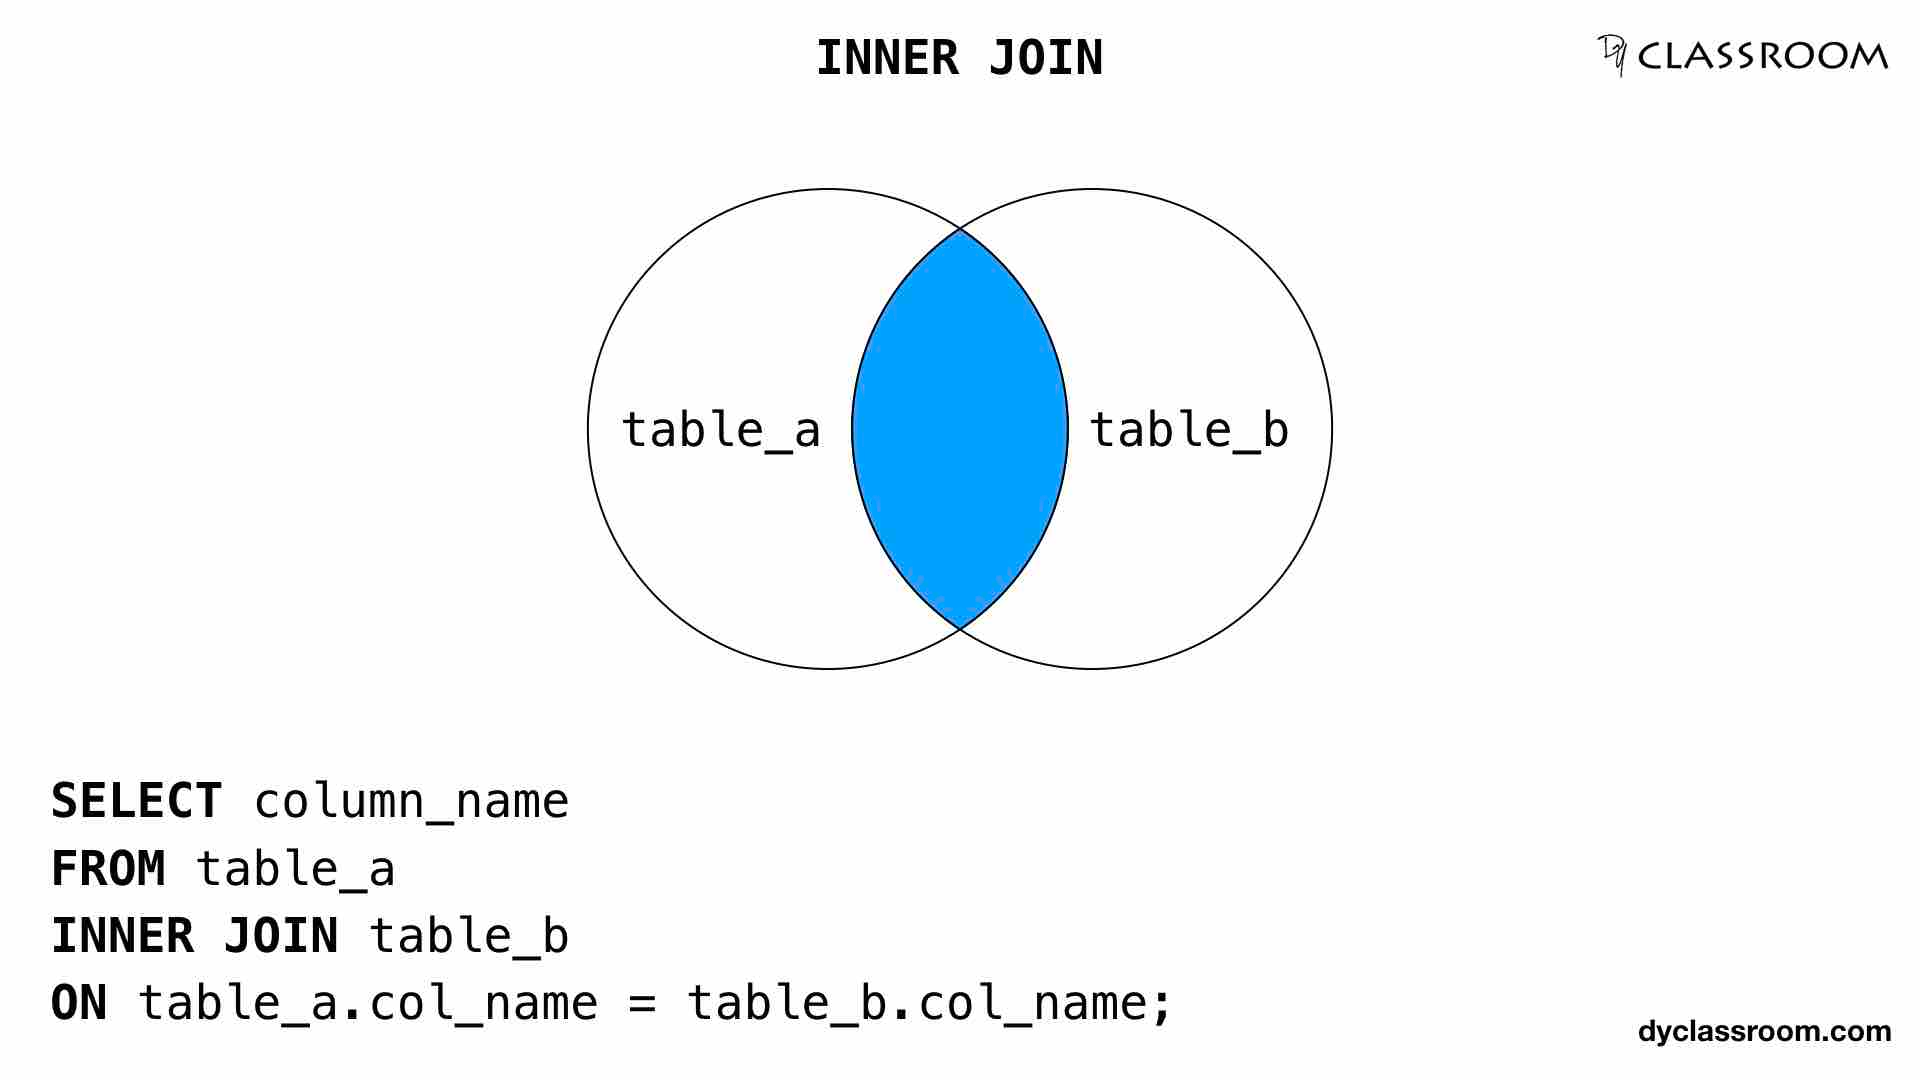


An inner join returns the rows which match the condition you're joining on. **Only** rows that match the condition are returned. For our `Customers`/`Orders` example, an inner join will join the two tables based on the `customer_id`. In our example, a customer can have many orders so each order will be matched with a customer with the corresponding `customer_id`. So we'll get multiple orders with the same customer information.

```sqlite
SELECT column_name
FROM table_a
INNER JOIN table_b
ON table_a.col_name = table_b.col_name

```

In [11]:
with_conn("SELECT c.name, c.address, c.email, o.total, o.shipped \
FROM Customers AS c INNER JOIN Orders AS o ON c.customer_id = o.customer_id;") 

[('alice', '20 Broadway', 'alice@gmail.com', 20000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 10000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 5000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 25000, 1),
 ('alice', '20 Broadway', 'alice@gmail.com', 21000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 20000, 0),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 20000, 0),
 ('alice', '20 Broadway', 'alice@gmail.com', 10000, 0)]

In [12]:
# Considered better practice, more specific 

with_conn("SELECT c.name, c.address, c.email, o.total, o.shipped \
FROM Customers AS c JOIN Orders AS o ON c.customer_id = o.customer_id;")  # implicitly a JOIN is an INNER JOIN

[('alice', '20 Broadway', 'alice@gmail.com', 20000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 10000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 5000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 25000, 1),
 ('alice', '20 Broadway', 'alice@gmail.com', 21000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 20000, 0),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 20000, 0),
 ('alice', '20 Broadway', 'alice@gmail.com', 10000, 0)]

In [13]:
# order does not matter

with_conn("SELECT c.name, c.address, c.email, o.total, o.shipped \
FROM Orders AS o JOIN Customers AS c ON c.customer_id = o.customer_id;")

[('alice', '20 Broadway', 'alice@gmail.com', 20000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 10000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 5000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 25000, 1),
 ('alice', '20 Broadway', 'alice@gmail.com', 21000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 20000, 0),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 20000, 0),
 ('alice', '20 Broadway', 'alice@gmail.com', 10000, 0)]

# `LEFT JOIN`

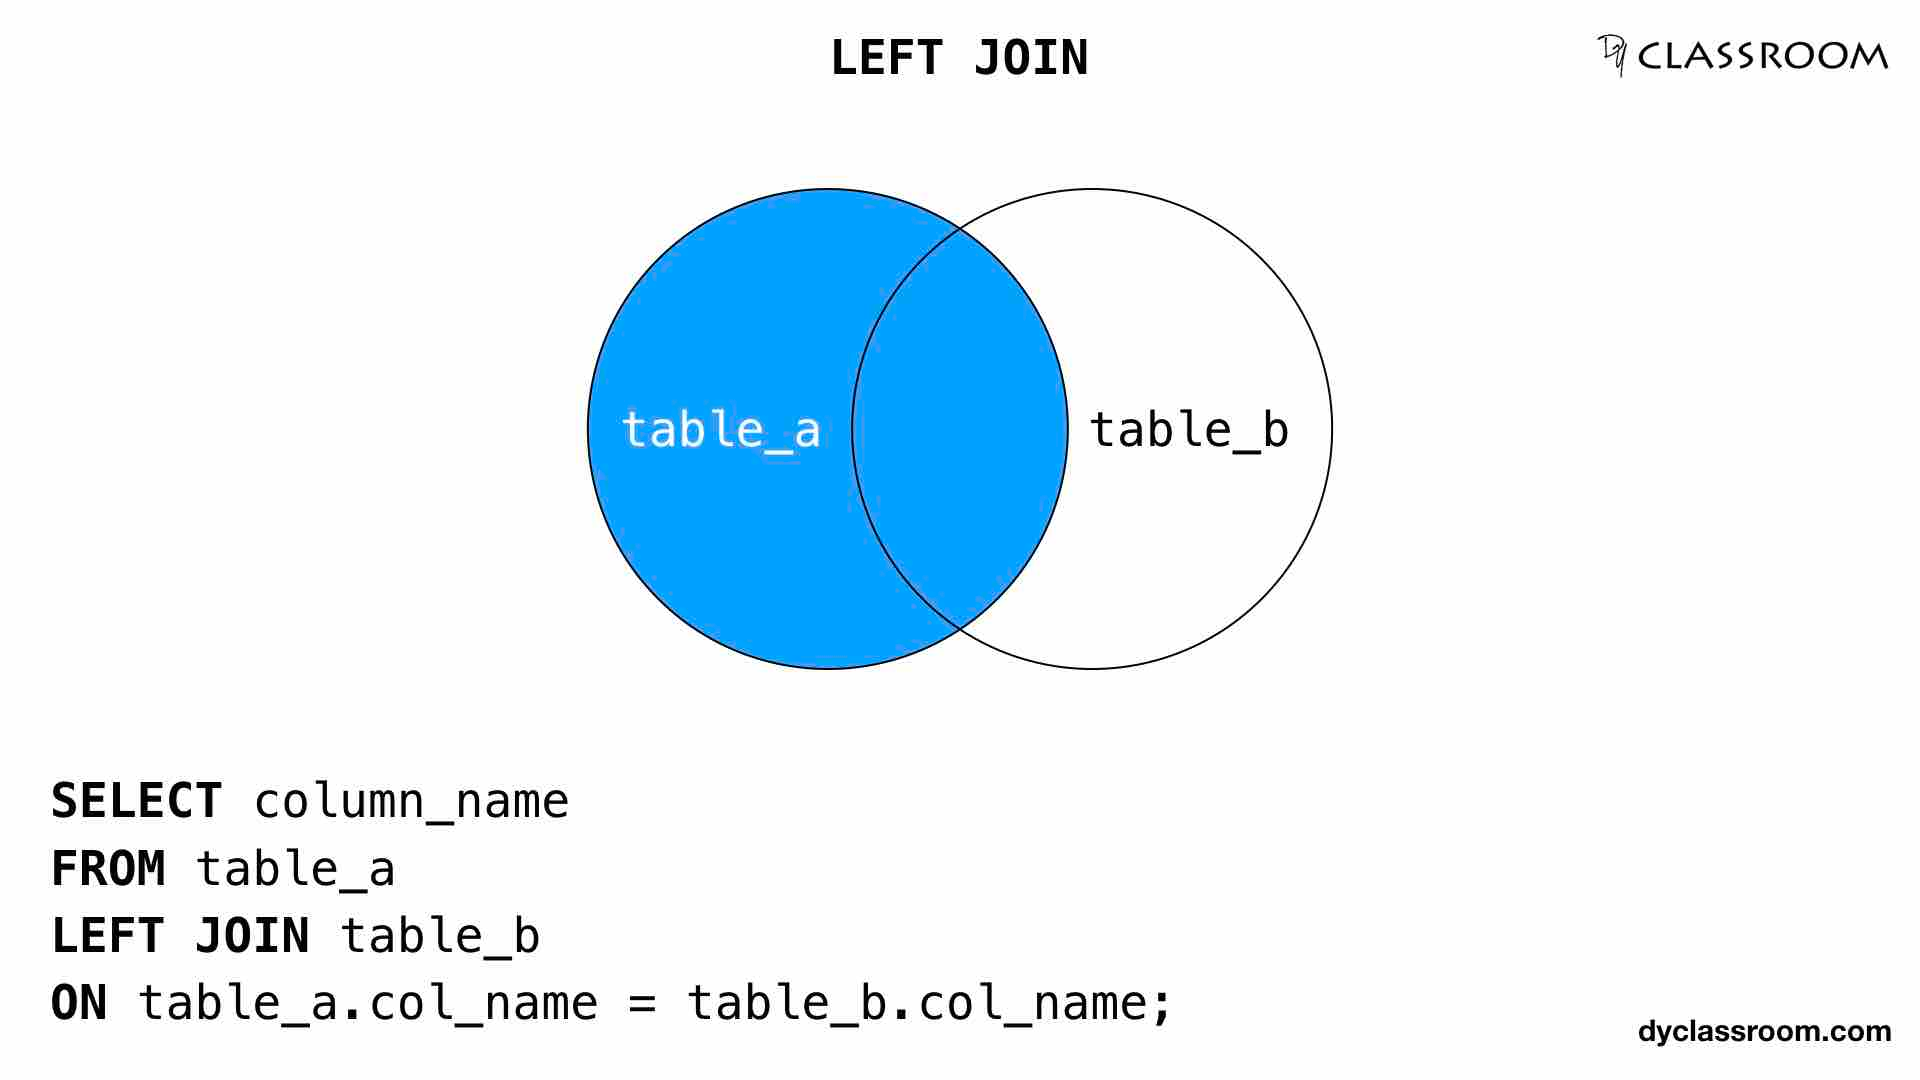

A left join returns, at the minimum, the same thing as an inner join (the tables joined by the matching condition). However, it also returns the information from the left table that do not match with the right table. Meaning if we wanted to `SELECT * FROM a LEFT JOIN b ON a.id = b.id`, we'd join the table by matching `id` but we'll also select from `a` rows that do not have a row in table `b` with matching `id`. 

```sqlite

SELECT column_name
FROM table_a
LEFT JOIN table_b
ON table_a.col_name = table_b.col_name

```

In [14]:
# same but with LEFT JOIN
# Get back same as before, returning overlapped info where cust_id matches but also no match, 

with_conn("SELECT c.name, c.address, c.email, o.total, \
o.shipped FROM Customers AS c LEFT JOIN Orders AS o ON \
c.customer_id = o.customer_id;")

[('alice', '20 Broadway', 'alice@gmail.com', 10000, 0),
 ('alice', '20 Broadway', 'alice@gmail.com', 20000, 1),
 ('alice', '20 Broadway', 'alice@gmail.com', 21000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 10000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 20000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 25000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 5000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 20000, 0),
 ('dave', '345 Chambers Street', 'dave@dave.com', None, None)]

In [15]:
# Total number even if they never ordered, reason why we would use LEFT Join (or Right Join) -> that might be blanked 
# Left join essentially returns everything from the first table
with_conn("SELECT c.name, sum(o.total) \
FROM Customers AS c LEFT JOIN Orders AS o ON \
c.customer_id = o.customer_id GROUP BY o.customer_id;")

[('dave', None), ('alice', 51000), ('bob', 55000), ('carol', 25000)]

What if you want the rows of the left table that have no match in the right table? 

(note: we get only one customer back; the one that has not ordered anything yet)

In [16]:
# only in table a but NOT in the middle part, table B


with_conn("SELECT c.name, c.address, c.email, o.total, \
o.shipped FROM Customers AS c LEFT JOIN Orders AS o ON \
c.customer_id = o.customer_id WHERE o.customer_id IS NULL;")

[('dave', '345 Chambers Street', 'dave@dave.com', None, None)]

In [17]:
# what if we switched around this order
# Everything from orders
# Every order has to matched to a customer


with_conn("SELECT c.name, c.address, c.email, o.total, \
o.shipped FROM Orders AS o LEFT JOIN Customers AS c ON \
c.customer_id = o.customer_id;")

[('alice', '20 Broadway', 'alice@gmail.com', 20000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 10000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 5000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 25000, 1),
 ('alice', '20 Broadway', 'alice@gmail.com', 21000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 20000, 0),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 20000, 0),
 ('alice', '20 Broadway', 'alice@gmail.com', 10000, 0)]

### Right Join

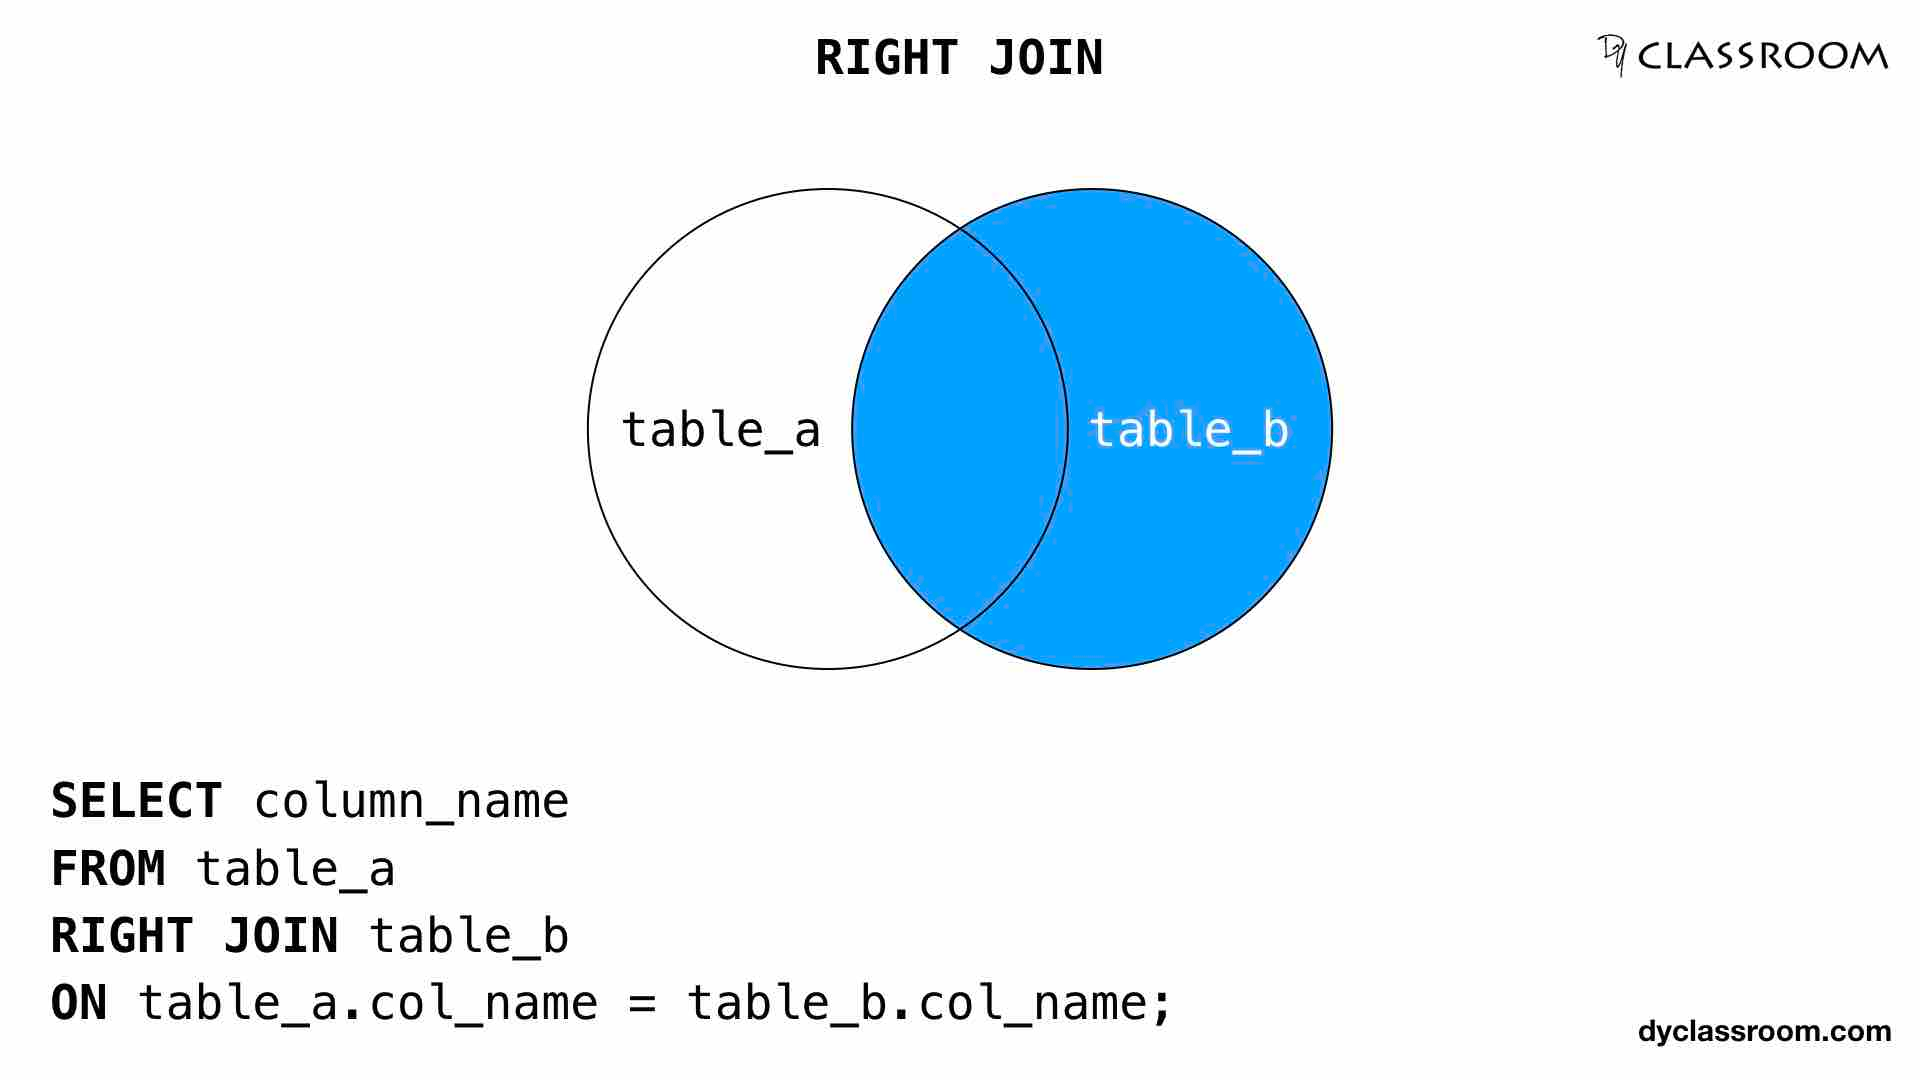

A right (outer) join is exactly the same thing as a left join but returns rows from the right table that do not have a match in the left table. A right join is the same thing as a left join with the tables switched.

```sqlite
SELECT column_name
FROM table_a
RIGHT JOIN table_b
ON table_a.col_name = table_b.col_name
```
is the same thing as:

```sqlite
SELECT column_name
FROM table_b
LEFT JOIN table_a
ON table_b.col_name = table_a.col_name



In [18]:
with_conn("SELECT c.name, c.address, c.email, o.total, \
o.shipped FROM Customers AS c RIGHT JOIN Orders AS o ON \
c.customer_id = o.customer_id WHERE o.customer_id IS NULL;")

OperationalError: RIGHT and FULL OUTER JOINs are not currently supported

In [19]:
# Tables reversed will be technically RIGHT join

with_conn("SELECT c.name, c.address, c.email, o.total, \
o.shipped FROM Orders AS o LEFT JOIN Customers AS c ON \
c.customer_id = o.customer_id;")

[('alice', '20 Broadway', 'alice@gmail.com', 20000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 10000, 1),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 5000, 1),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 25000, 1),
 ('alice', '20 Broadway', 'alice@gmail.com', 21000, 0),
 ('bob', '72 4th Ave', 'bob@tutanota.com', 20000, 0),
 ('carol', '1002 138th Street', 'carol@protonmail.com', 20000, 0),
 ('alice', '20 Broadway', 'alice@gmail.com', 10000, 0)]

What if you want the rows of the right table that don't have a match in the left table? We do the same thing from before with our tables switched.

(note: we get nothing back because all `Orders` have `customer_id` as `NOT NULL` so all rows in `Orders` have a `customer_id` match in table `Customers`.)

In [20]:
with_conn("SELECT c.name, c.address, c.email, o.total, \
o.shipped FROM Orders AS o LEFT JOIN Customers AS c ON \
c.customer_id = o.customer_id WHERE c.customer_id IS NULL;")

[]

# `FULL OUTER JOIN`

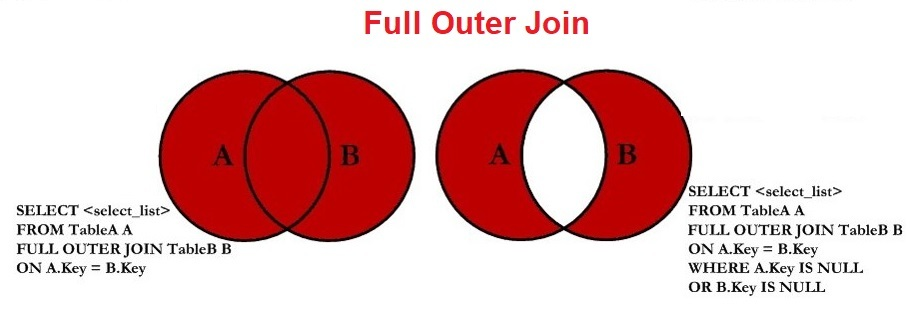

A full outer join still joins the two table based on the match condition but also returns the rows of the left and right table that do not have matches.

Currently, `sqlite` does not support full joins (same with right joins).

In [ ]:
# How to put together some statements to put together FULL OUTER JOIN
# Left join + switch tables = right join will return everything that doesn't overlap -> To recreate Full Join

In [ ]:
# Most common ones will be INNER & LEFT Join
# Left join pick up information thats not in the other table

In [ ]:
with_conn("SELECT c.name, c.address, c.email, o.total, \
o.shipped FROM Orders AS o FULL JOIN Customers AS c ON \
c.customer_id = o.customer_id WHERE c.customer_id IS NULL;")

### subqueries

There is no general syntax for subsqueries. Subqueries are essentially regular queries placed insider parenthesis and which are executed before the surrounding query. Meaning it can be useful for selecting information to be used in a larger query.

```sqlite

SELECT column_name 
FROM table_name
WHERE column_name IN (SELECT column_name
                  FROM table_name2
                 WHERE condition)
```

```sqlite

SELECT (SELECT column_name from table_name WHERE condition),
       column_name
FROM table_name
WHERE condtion
```

In [21]:
with_conn("SELECT customer_id FROM Orders WHERE shipped=True;")

[(1,), (2,), (3,), (2,)]

In [22]:
# advanced, more when want to put things together, name and address
# by using subquery, when statement can't be simplified, need to get cust_id from differnet place

with_conn("SELECT name, address FROM Customers WHERE customer_id IN \
(SELECT customer_id FROM Orders WHERE shipped=True);")                      # using query to get results from second query

[('alice', '20 Broadway'),
 ('bob', '72 4th Ave'),
 ('carol', '1002 138th Street')]

In [24]:
# subquery
# Inner Join
# Example, can probably be optimized

with_conn("SELECT (SELECT COUNT(*) FROM Orders WHERE \
customer_id = c.customer_id),name, address FROM \
Customers AS c, Orders AS o WHERE c.customer_id = o.customer_id;")   

[(3, 'alice', '20 Broadway'),
 (3, 'bob', '72 4th Ave'),
 (2, 'carol', '1002 138th Street'),
 (3, 'bob', '72 4th Ave'),
 (3, 'alice', '20 Broadway'),
 (3, 'bob', '72 4th Ave'),
 (2, 'carol', '1002 138th Street'),
 (3, 'alice', '20 Broadway')]

You can also use a `SELECT` statement to select information to insert into a table.

```sqlite
INSERT INTO table_name (column1, column2, column3)
SELECT col1, col2, col3
FROM other_table_name;


INSERT INTO Customer (name, address, email)
SELECT user, address, email
FROM email_list
WHERE user IS NOT NULL, address is NOT NULL;

```

In [25]:
with_conn("SELECT * FROM Customers")

[(1, 'alice', '20 Broadway', 'alice@gmail.com'),
 (2, 'bob', '72 4th Ave', 'bob@tutanota.com'),
 (3, 'carol', '1002 138th Street', 'carol@protonmail.com'),
 (4, 'dave', '345 Chambers Street', 'dave@dave.com')]

In [26]:
with_conn("SELECT * FROM email_list")

[(1, None, None, 'random@person.com'), (2, 'name', 'address', 'email')]

In [27]:
with_conn("SELECT user, address, email FROM email_list \
WHERE user IS NOT NULL AND address IS NOT NULL;")

[('name', 'address', 'email')]

In [28]:
# take result and inserting into Customers

with_conn("INSERT INTO Customers (name, address, email) \
SELECT user, address, email FROM email_list \
WHERE user IS NOT NULL AND address IS NOT NULL;")

[]

In [29]:
with_conn("SELECT * FROM Customers")

[(1, 'alice', '20 Broadway', 'alice@gmail.com'),
 (2, 'bob', '72 4th Ave', 'bob@tutanota.com'),
 (3, 'carol', '1002 138th Street', 'carol@protonmail.com'),
 (4, 'dave', '345 Chambers Street', 'dave@dave.com'),
 (5, 'name', 'address', 'email')]

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Other related topics</h1> 
</div>

### `matplotlib.pyplot.savefig`

Saves the current figure (which is also whatever `plt.show()` would produce). Depending on the `backend` you provide, you will get a different format for your saved figure (default is `png`). 

Call signature
```python
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
```

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

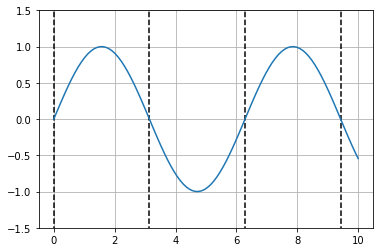

In [31]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y)
for i in range(4):
    plt.vlines(i*3.14,-10,10, 'k', linestyle='dashed')
plt.ylim([-1.5,1.5])
plt.grid()

In [32]:
plt.savefig('./image.png')
#plt.savefig(f'./image.png')

<Figure size 432x288 with 0 Axes>

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>K Means Clustering</h1> 
</div>

The following is adapted from: https://medium.com/data-folks-indonesia/step-by-step-to-understanding-k-means-clustering-and-implementation-with-sklearn-b55803f519d6

### Clustering

We've discussed how clustering works differently than classification in that instead of adjusting based on error metrics (since with classification we have output labels we can check for errors), clustering groups data based on similarity but what does that mean? Proximity. We consider two pieces of data as similar if, according to the features we're looking at, the distance is small.

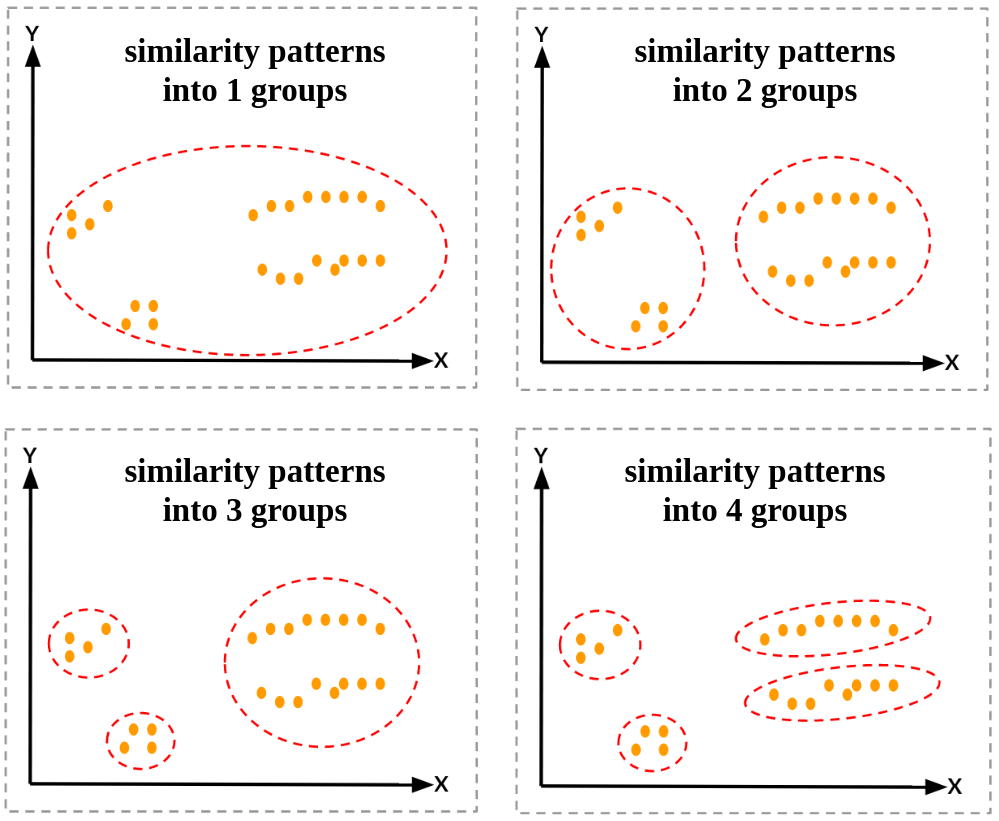

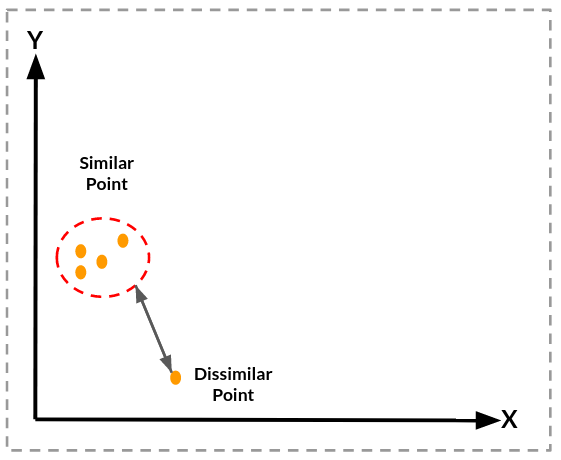

### So how does this work for K-Means clustering?

K-means clustering is a method of partitioning a data set into $K$ distinct, non-overlapping clusters. We must provide a number $K$ and then the algorithm will assign each observation into exactly one of the clusters.

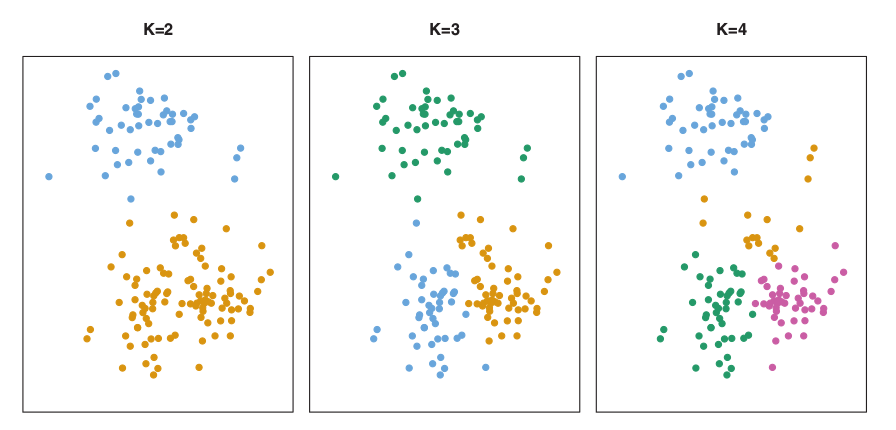

The K-means algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as inertia or within-cluster sum-of-squares. The K-means algorithm aims to choose a centroid that minimizes the inertia or within-cluster sum-of-squares criterion.

$$ \sum_{i=0}^{n}\min_{\mu \in C}(||x_i - \mu_j ||^{2})$$

Step 1. Determine $k$, the number of clusters.

Let's assume $k=3$ for now.

Step 2. Randomly generate $k$ distinct centroids

If $k=3$, then we generate 3 centroids.

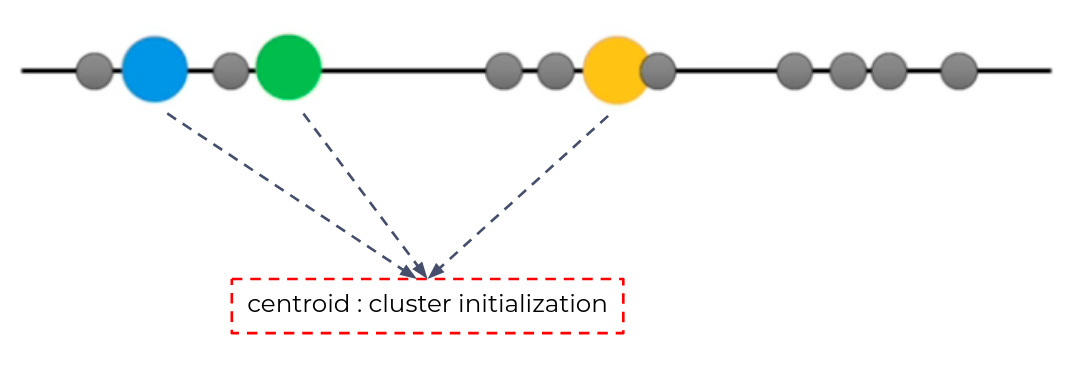

Step 3. Measure the euclidean distance between each point and centroid.

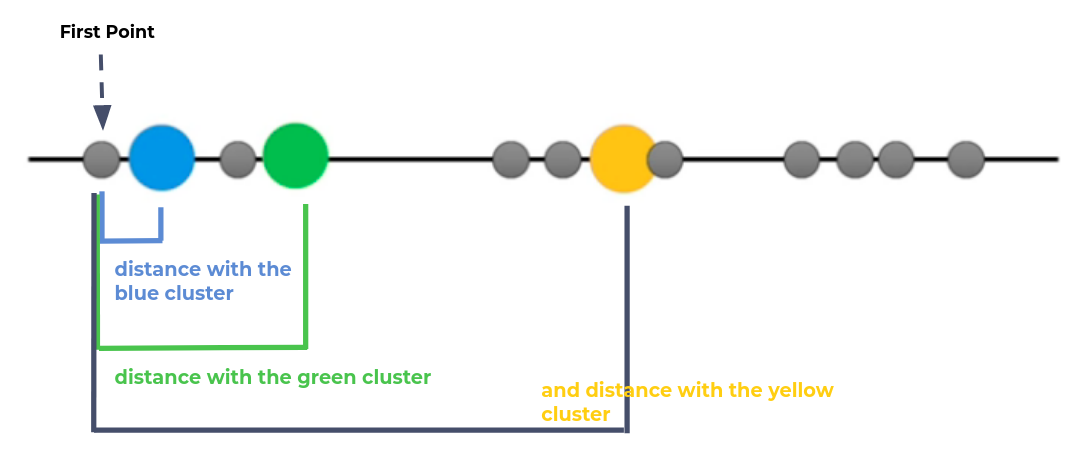

Step 4. Assign each point to the nearest cluster.

Group points based on distance/proximity to centroid.

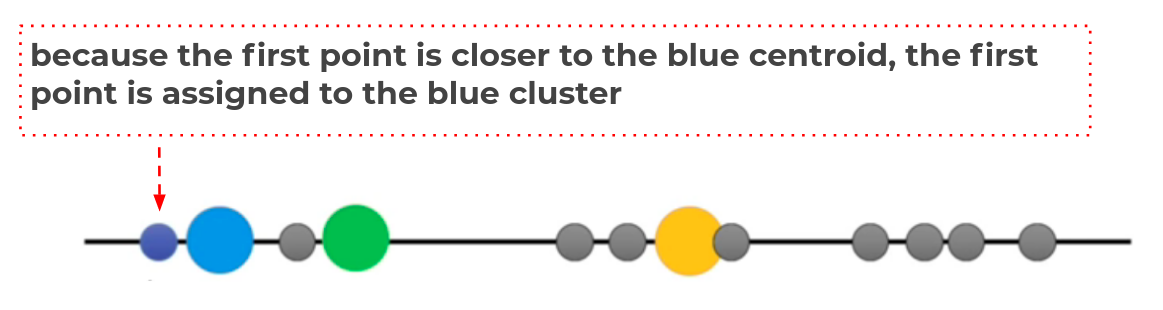

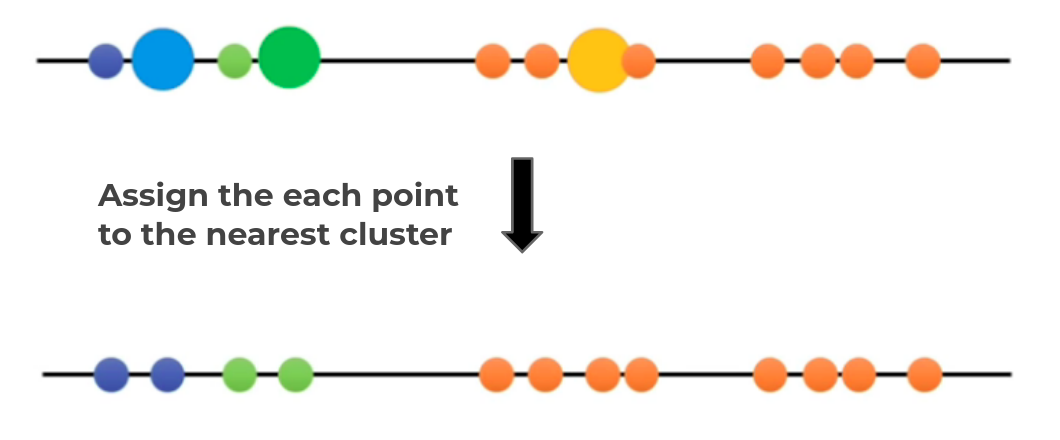

Step 5. Update the centroid using the mean of each cluster.

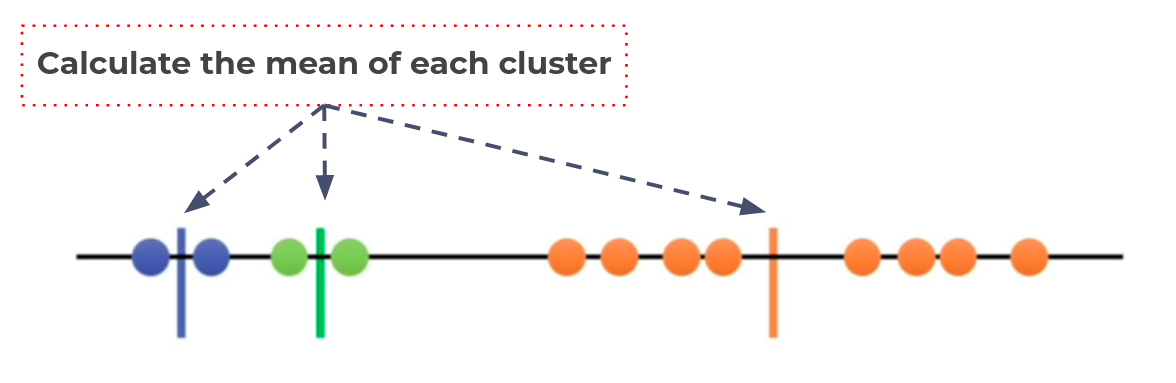

Step 6. Repeat steps 3-5 with the new centroid.

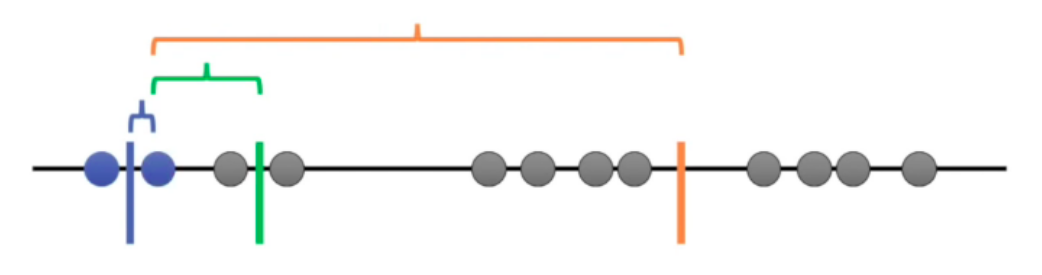

Repeat until:
* Convergence (further iterations don't result in changes)
* Maximum number of iterations

If our cluster ends up converging to below, we continue our process.

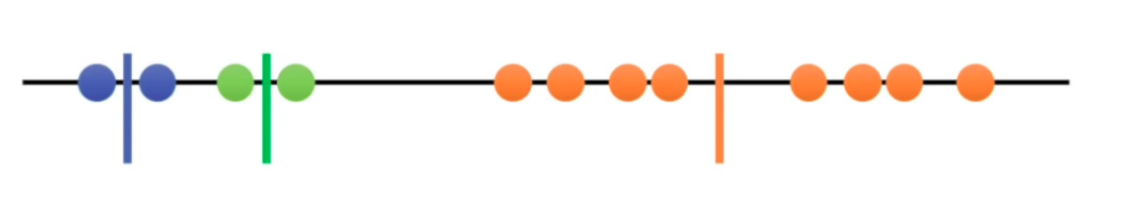

Step 7. Measure the variance.

We would like to minimum within-cluster sum-of-squares which is essentially variance. So we need to calculate our variance and see how it fares.

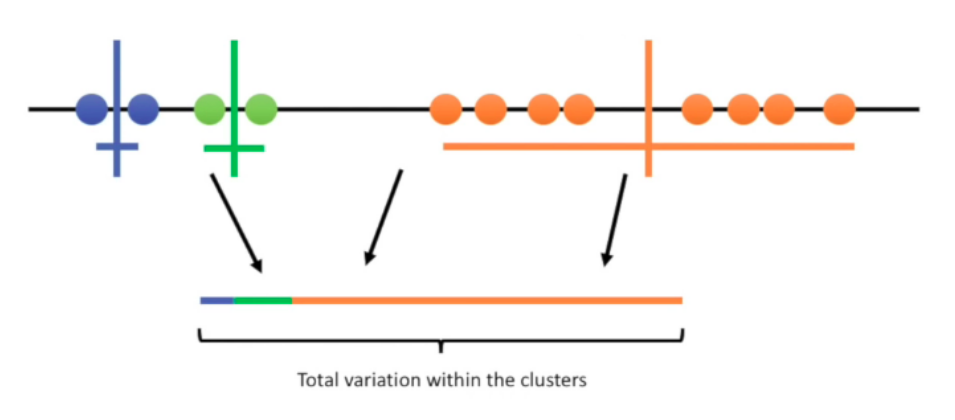

Since we don't know what the "answer" is, the algorithm keeps track of these values as it repeats the entire process attempting to minimum variance.

Step 8. Repeat step 2-7 until we get the lowest sum of variance.

The algorithm repeats the steps with random centroids.

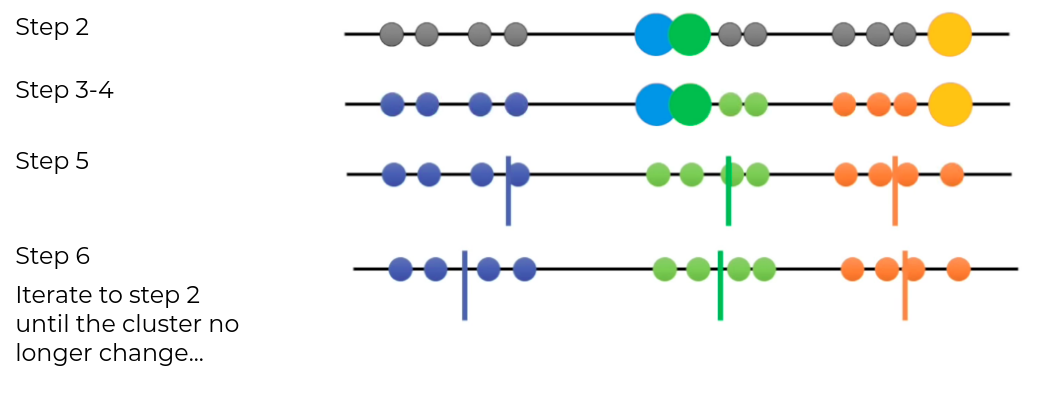

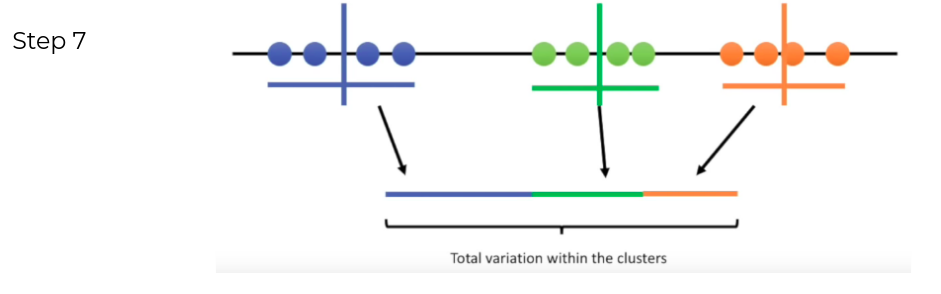

This repeats until we get to the previous stop conditions:
* Convergence (further iterations don't result in changes)
* Maximum number of iterations

Then the attemp with the lowest within-cluster sum-of-squares is chosen as the result.

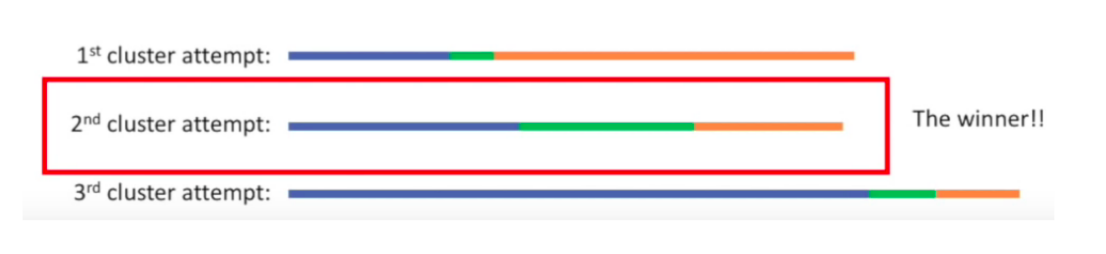

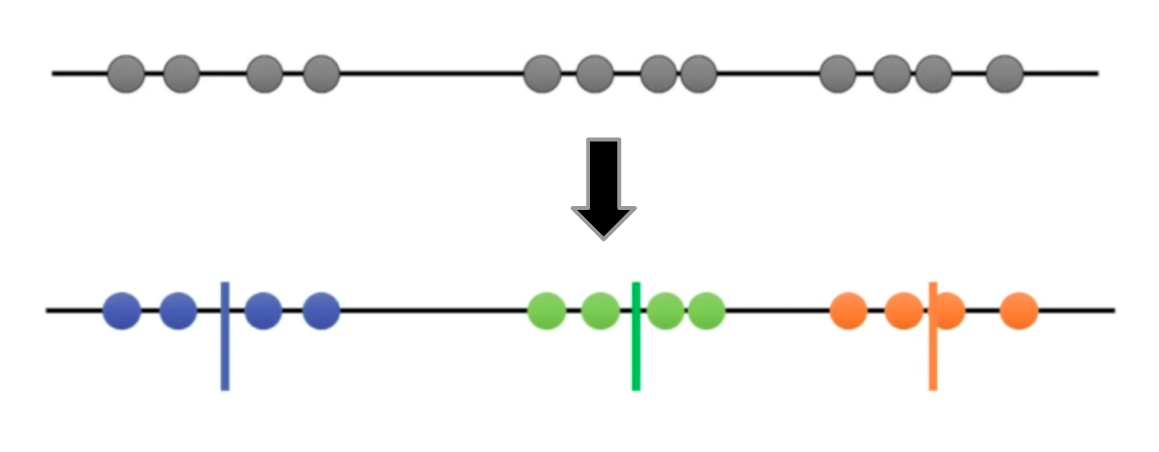

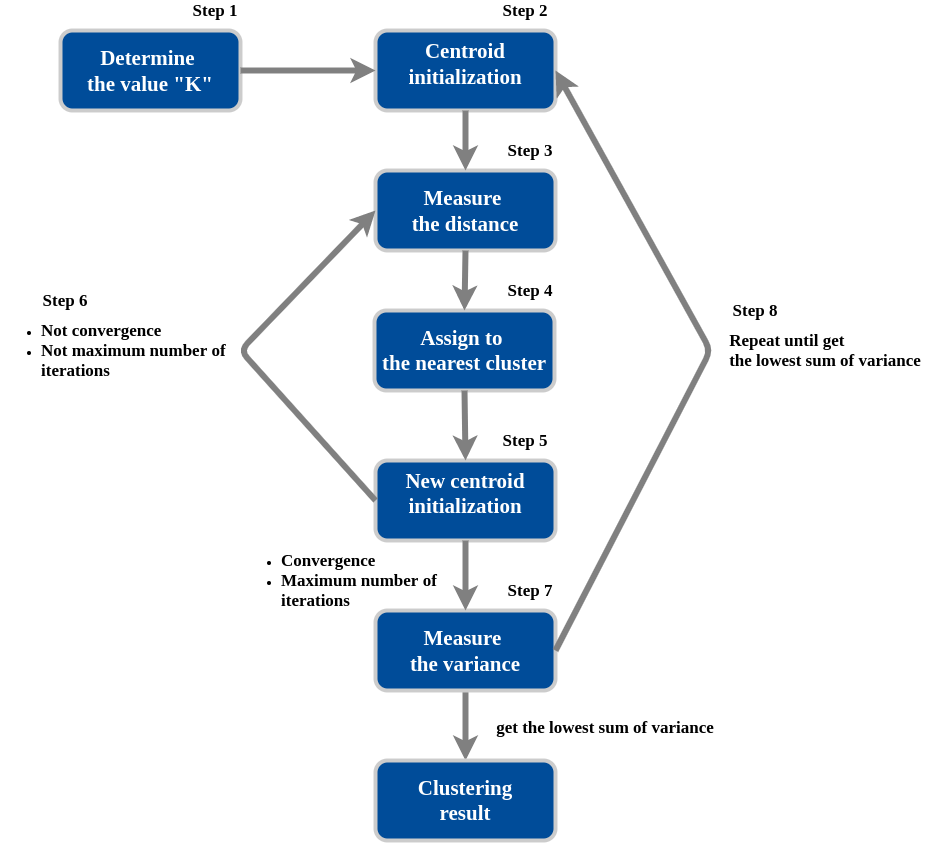



In [33]:
df = pd.read_csv('../datasets/mall_customers.csv')

In [34]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [35]:
'columns: ' + ', '.join(df.columns)

'columns: CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)'

In [36]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [37]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
df['Age'].mean()

38.85

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dfa = df[['Age','Annual Income (k$)']]

print('Total Row : ', len(dfa))## Feature Scaling
print(dfa)

Total Row :  200
     Age  Annual Income (k$)
0     19                  15
1     21                  15
2     20                  16
3     23                  16
4     31                  17
..   ...                 ...
195   35                 120
196   45                 126
197   32                 126
198   32                 137
199   30                 137

[200 rows x 2 columns]


In [45]:
sc_dfa = StandardScaler()

# this scales our df to a standard scale (0 mean and unit variance)
# scaled dataframe
dfa_std = sc_dfa.fit_transform(dfa.astype(float))## Clustering with KMeans
dfa_std[:5]


array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033]])

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)

labels = kmeans.labels_

new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels

new_dfa.head()

Age  Annual Income (k$)  label_kmeans
0 -1.424569           -1.738999             0
1 -1.281035           -1.738999             0
2 -1.352802           -1.700830             0
3 -1.137502           -1.700830             0
4 -0.563369           -1.662660             0

In [47]:
#pseudo-random num generation

kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)   # pt at which start at random num generation

labels = kmeans.labels_

new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels

new_dfa.tail()

Age  Annual Income (k$)  label_kmeans
195 -0.276302            2.268791             2
196  0.441365            2.497807             2
197 -0.491602            2.497807             2
198 -0.491602            2.917671             2
199 -0.635135            2.917671             2

In [ ]:
# Instead of talking about 38 but 0 and normalizing it, trying to scale a house, height of the house is scaled down to foot
# uniform so we could use it, like a normal variance, a la normal distribution

In [48]:
# very simple k-means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dfa = df[['Age','Annual Income (k$)']]

print('Total Row : ', len(dfa))## Feature Scaling

# this creates a standard scaler
sc_dfa = StandardScaler()

# this scales our df to a standard scale (0 mean and unit variance)
# scaled dataframe
dfa_std = sc_dfa.fit_transform(dfa.astype(float))## Clustering with KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)

labels = kmeans.labels_

new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels

new_dfa.head()

Total Row :  200


Age  Annual Income (k$)  label_kmeans
0 -1.424569           -1.738999             0
1 -1.281035           -1.738999             0
2 -1.352802           -1.700830             0
3 -1.137502           -1.700830             0
4 -0.563369           -1.662660             0

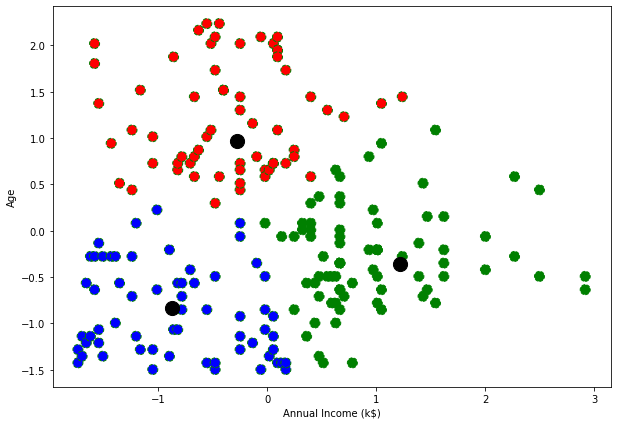

In [49]:
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')

plt.show()

Total Row :  200


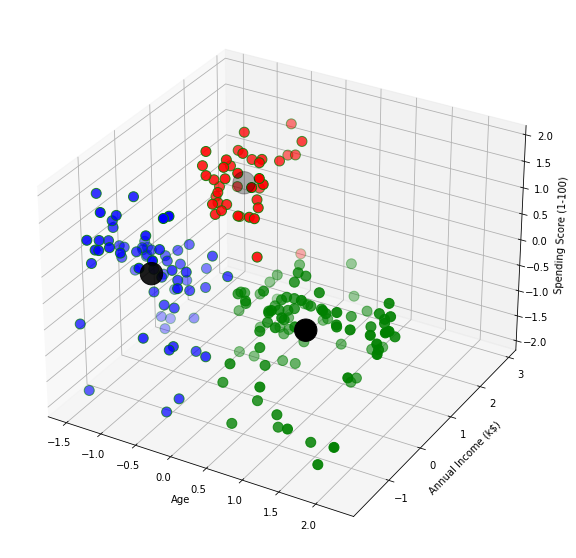

In [51]:
# very simple 3 feature k-means clustering

dfa = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
print('Total Row : ', len(dfa))## Feature Scaling
sc_dfa = StandardScaler()

dfa_std = sc_dfa.fit_transform(dfa.astype(float))## Clustering with KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)

labels = kmeans.labels_
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)','Spending Score (1-100)'])

new_dfa['label_kmeans'] = labels

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 0], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 0], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 0], c='blue', s=100, edgecolor='green',linestyle='-')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 1], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 1], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 1], c='red', s=100, edgecolor='green',linestyle='-')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 2], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 2], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 2], c='green', s=100, edgecolor='green',linestyle='-')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 3], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 3], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 3], c='orange', s=100, edgecolor='green',linestyle='-')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 4], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 4], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 4], c='purple', s=100, edgecolor='green',linestyle='-')

centers = kmeans.cluster_centers_

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=500);

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

The following is taken from:
https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis/notebook

### TAKE NOTE OF WAY THIS PERSON DID THE CHARTING !!!


In [52]:
plt.style.use('fivethirtyeight')

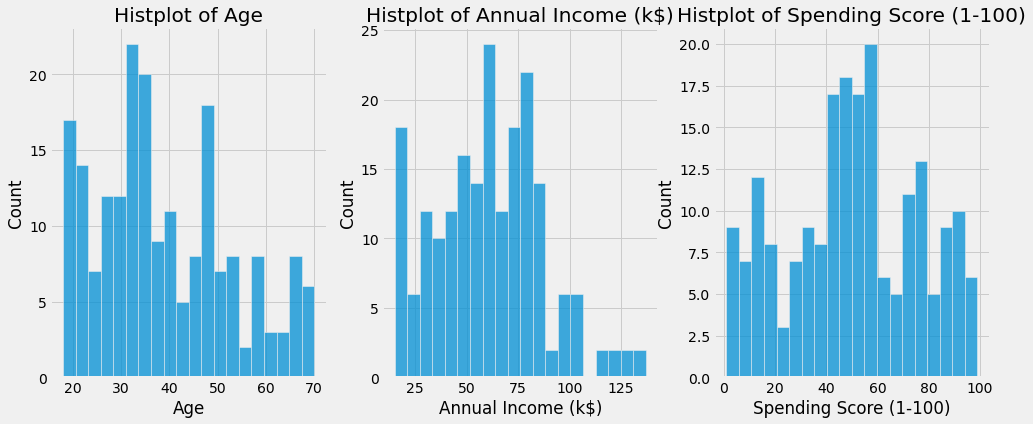

In [53]:
df = pd.read_csv('../datasets/mall_customers.csv')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.histplot(df[x] , bins = 20)
    plt.title('Histplot of {}'.format(x))
plt.show()

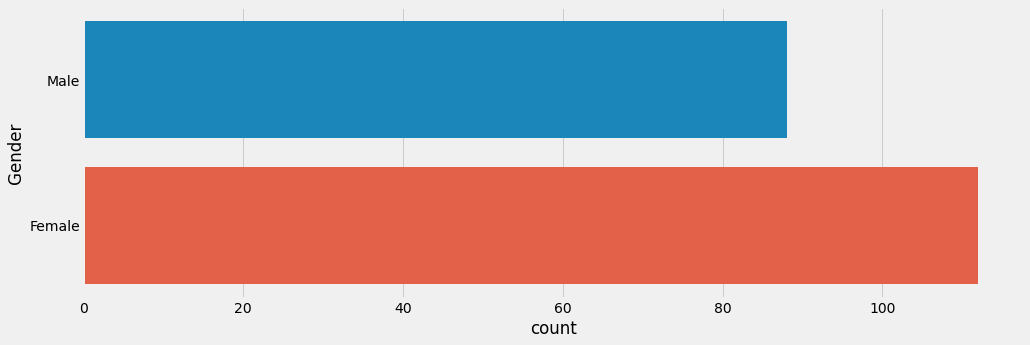

In [54]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

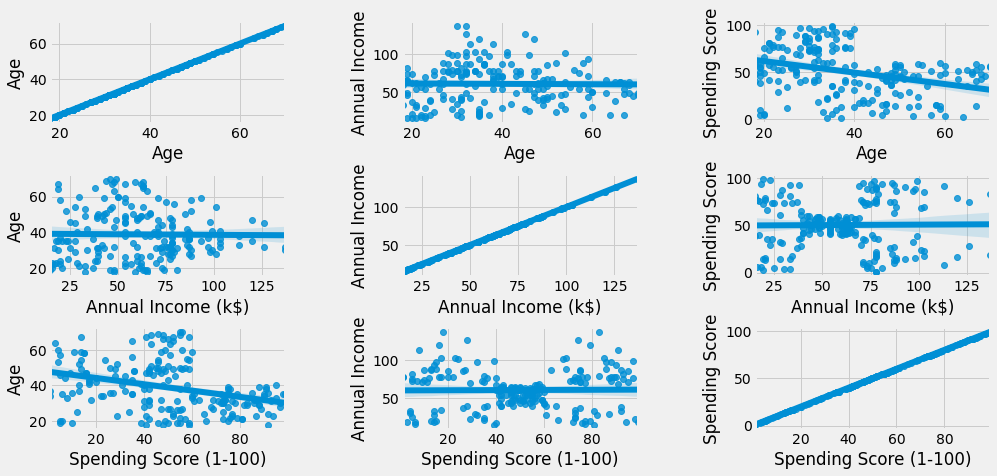

In [55]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

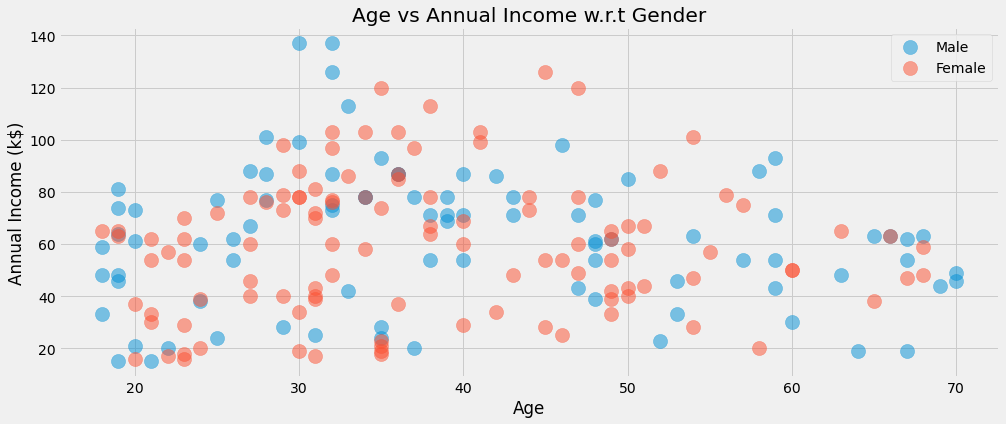

In [56]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

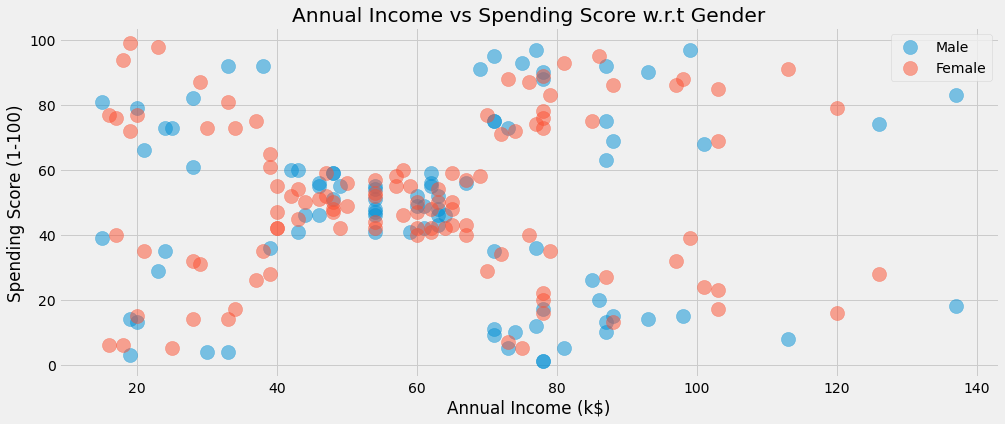

In [57]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

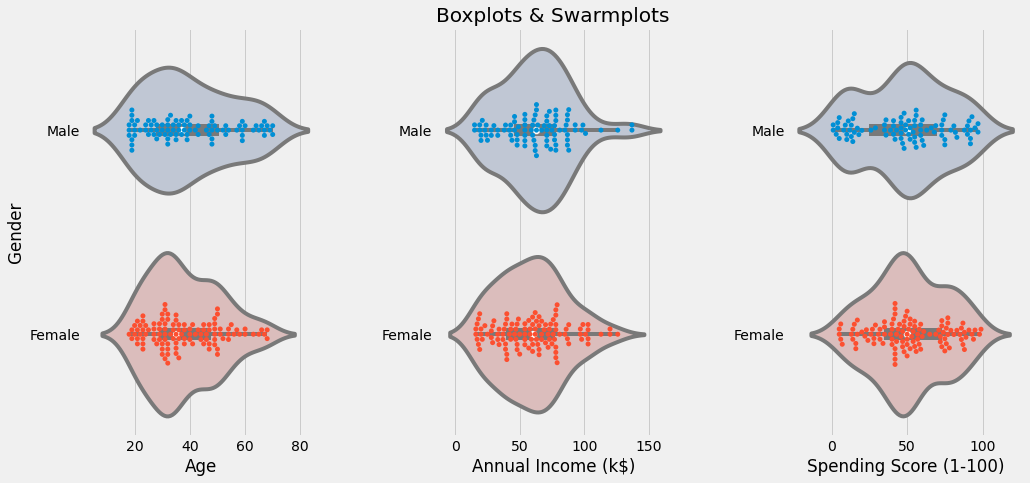

In [58]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [59]:
from sklearn.cluster import KMeans

'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Lowest sum of squares, lowest inertia

In [ ]:
# after 4, inertia does not drop that much
# so 4 is the number of clusters we should use

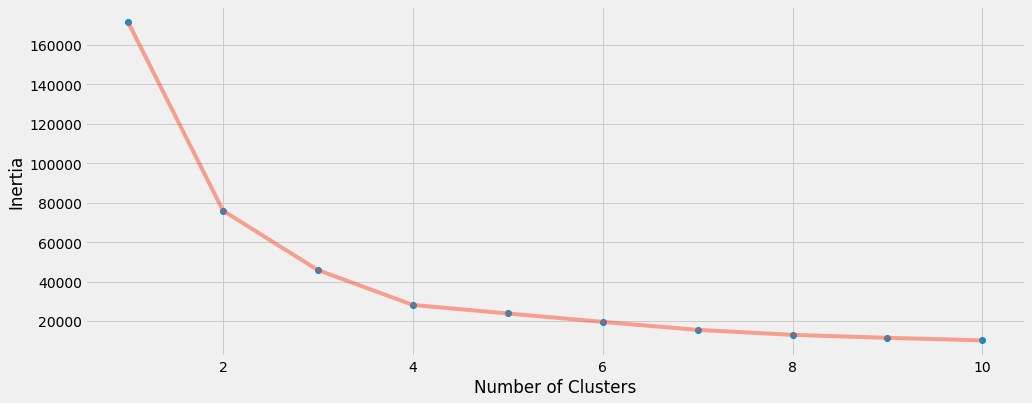

In [60]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [61]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [62]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

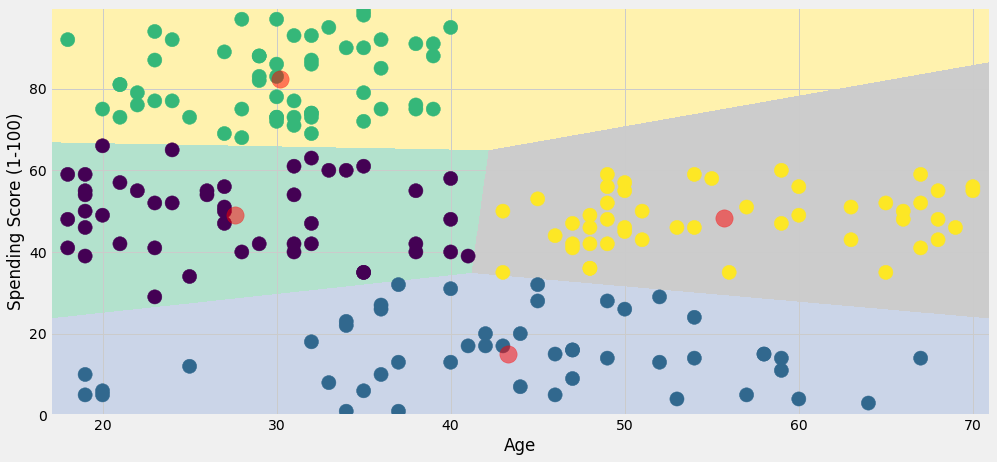

In [63]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [65]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

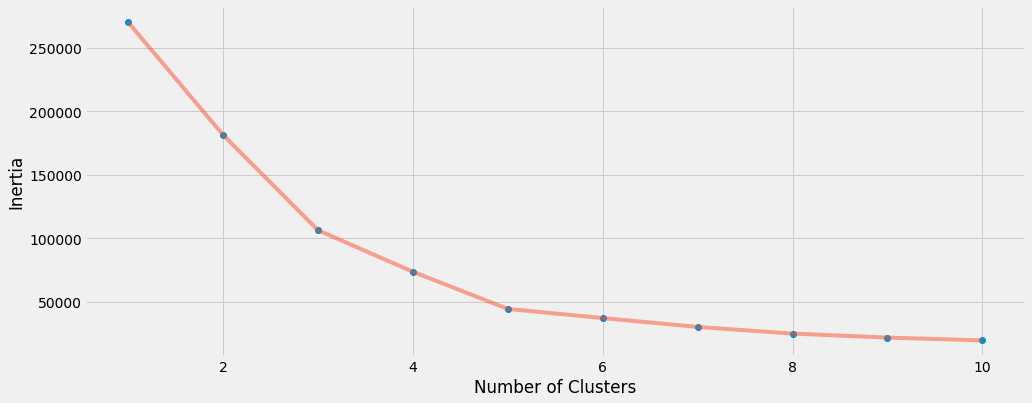

In [66]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [67]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [68]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

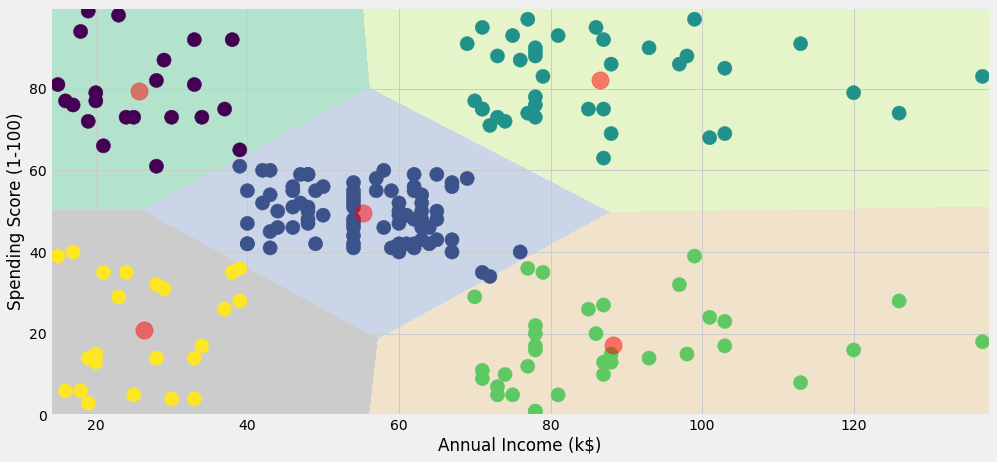

In [69]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [70]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

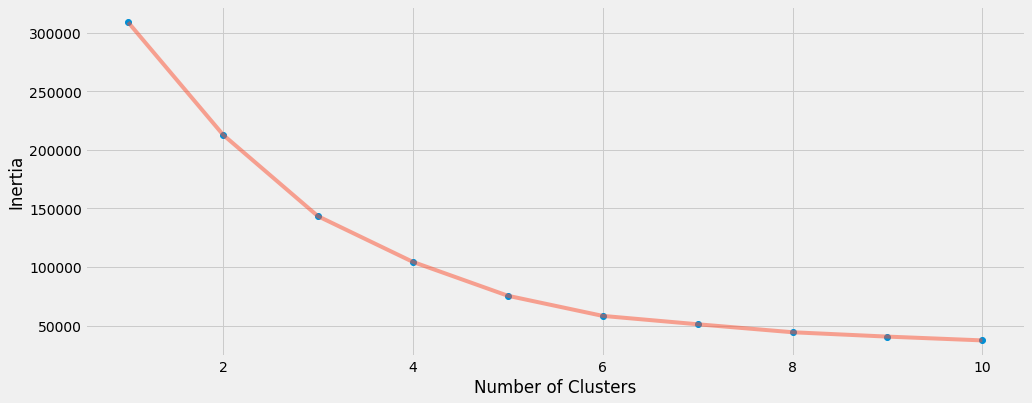

In [71]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [72]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [77]:
!pip install plotly


     |████████████████████████████████| 13.2 MB 5.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=895a53ba5b04a19ec4b1d3844e23e4f01f4141491c72c75868d180cb111d80cd
  Stored in directory: /Users/faustorosado/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [78]:
import plotly as py
import plotly.graph_objs as go

df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

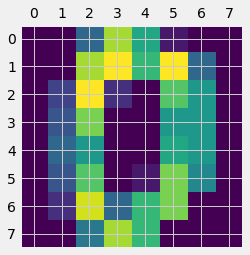

In [80]:
from sklearn.datasets import load_digits

digits = load_digits()

plt.matshow(digits.images[0])

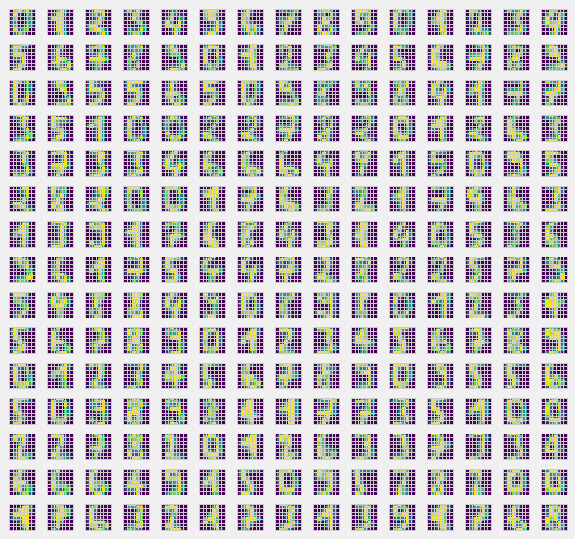

In [81]:
digits = load_digits()

m, n = 15, 15
fig, axes = plt.subplots(n,m, figsize=(9,9))
for i in range(n):
    for j in range(m):
        a = axes[i,j]
        a.matshow(digits.images[n*i+j])
        a.set_xticklabels([])
        a.set_yticklabels([])